<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/MISSINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",200)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/home/carlita/Documents/Diplomado/Código/employees_2.csv")

## PASO 1

In [ ]:
#Conocer la completitid de cada variable, eliminar aquellas que no tengan al menos el 80% de completitud

In [ ]:
completitud=pd.DataFrame((1-df.isnull().sum()/df.shape[0])*100).reset_index().rename(columns={"index":"columna",0:"completitud"})

In [ ]:
completitud

,columna,completitud
0,v_first_name,93.1
1,v_gender,85.2
2,c_salary,99.8
3,c_bonus_%,99.7
4,v_senior_mana,93.2
5,v_team,95.7
6,c_bonus_2,46.4


In [ ]:
df.drop(columns=["c_bonus_2"],inplace=True)

## PASO 2

### FISRT NAME

In [ ]:
# Revisar variable por variable para validar el tipo de dato y que todos los registros tengan el mismo formato

In [ ]:
df["v_first_name"].isnull().sum()

69

In [ ]:
df["v_first_name"].value_counts()

Marilyn    11
Barbara    10
Jeremy     10
Todd       10
Kathy       9
           ..
Tammy       1
Angela      1
Brian       1
Keith       1
1           1
Name: v_first_name, Length: 206, dtype: int64

In [ ]:
#De acuerdo a la naturaleza de la variable los registros deben ser letras y 
#contener una longitud mínima correspondiente a los nombre

In [ ]:
df[df["v_first_name"].map(lambda x:sum([y.isdigit() for y in str(x)])>0)]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
0,23,Male,97308,6.945,TRUE,Marketing
1,1,Male,61933,NaN,TRUE,NaN
2,2,Female,130590,11.858,FALSE,0.112
12,12346,Male,112807,17.492,TRUE,Human Resources
333,443,Female,110061,7.494,FALSE,Client Services


In [ ]:
df[df["v_first_name"].map(lambda x:len(str(x))<2)].head(50)

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
1,1,Male,61933,NaN,TRUE,NaN
2,2,Female,130590,11.858,FALSE,0.112
57,?,Male,64715,15.107,TRUE,Human Resources


In [ ]:
import numpy as np

In [ ]:
df["v_first_name"].map(lambda x:np.nan if sum([y.isdigit() for y in str(x)])>0 else x)

0          NaN
1          NaN
2          NaN
3        Jerry
4        Larry
        ...   
995      Henry
996    Phillip
997    Russell
998      Larry
999     Albert
Name: v_first_name, Length: 1000, dtype: object

In [ ]:
df["v_first_name"]=df["v_first_name"].map(lambda x:np.nan if sum([y.isdigit() for y in str(x)])>0 else x)

In [ ]:
#Revisamos que ya no tengamos ese tipo de datos
df[df["v_first_name"].map(lambda x:sum([y.isdigit() for y in str(x)])>0)]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team


In [ ]:
#Revisamos que esos valores se remplazaron por missings
df["v_first_name"].isnull().sum()

74

In [ ]:
#seguimos teniendo registros no aptos para la columna
df[df["v_first_name"].map(lambda x:len(str(x))<2)].head(50)

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
57,?,Male,64715,15.107,TRUE,Human Resources


In [ ]:
df["v_first_name"].map(lambda x:np.nan if len(str(x))<2 else x)

0          NaN
1          NaN
2          NaN
3        Jerry
4        Larry
        ...   
995      Henry
996    Phillip
997    Russell
998      Larry
999     Albert
Name: v_first_name, Length: 1000, dtype: object

In [ ]:
df["v_first_name"]=df["v_first_name"].map(lambda x:np.nan if len(str(x))<2 else x)

In [ ]:
#Revisamos que esos valores se remplazaron por missings
df["v_first_name"].isnull().sum()

75

In [ ]:
df[df["v_first_name"].map(lambda x:len(str(x))<2)].head(50)

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team


In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
0,NaN,Male,97308,6.945,TRUE,Marketing
1,NaN,Male,61933,NaN,TRUE,NaN
2,NaN,Female,130590,11.858,FALSE,0.112
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services
...,...,...,...,...,...,...
995,Henry,NaN,132483,16.655,FALSE,Distribution
996,Phillip,Male,42392,19.675,FALSE,Finance
997,Russell,Male,96914,1.421,FALSE,Product
998,Larry,Male,60500,11.985,FALSE,Business Development


### GENDER

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
0,NaN,Male,97308,6.945,TRUE,Marketing
1,NaN,Male,61933,NaN,TRUE,NaN
2,NaN,Female,130590,11.858,FALSE,0.112
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services
...,...,...,...,...,...,...
995,Henry,NaN,132483,16.655,FALSE,Distribution
996,Phillip,Male,42392,19.675,FALSE,Finance
997,Russell,Male,96914,1.421,FALSE,Product
998,Larry,Male,60500,11.985,FALSE,Business Development


In [ ]:
df["v_gender"].isnull().sum()

148

In [ ]:
df["v_gender"].value_counts()

Female    426
Male      423
n.a.        1
11          1
0           1
Name: v_gender, dtype: int64

In [ ]:
df[df["v_gender"].map(lambda x:sum([y.isdigit() for y in str(x)])>0)]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
10,Louise,0,63241,15.132,TRUE,NaN
33,Jean,11,119082,16.18,FALSE,Business Development


In [ ]:
df["v_gender"]=df["v_gender"].map(lambda x:np.nan if sum([y.isdigit() for y in str(x)])>0 else x)

In [ ]:
df["v_gender"].isnull().sum()

150

In [ ]:
df[df["v_gender"].isin(["n.a."])]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
5,Dennis,n.a.,115163,10.125,FALSE,Legal


In [ ]:
df["v_gender"]=df["v_gender"].map(lambda x:np.nan if str(x)=="n.a." else x)

In [ ]:
df[df["v_gender"].isin(["n.a."])]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team


In [ ]:
df["v_gender"].isnull().sum()

151

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
0,NaN,Male,97308,6.945,TRUE,Marketing
1,NaN,Male,61933,NaN,TRUE,NaN
2,NaN,Female,130590,11.858,FALSE,0.112
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services
...,...,...,...,...,...,...
995,Henry,NaN,132483,16.655,FALSE,Distribution
996,Phillip,Male,42392,19.675,FALSE,Finance
997,Russell,Male,96914,1.421,FALSE,Product
998,Larry,Male,60500,11.985,FALSE,Business Development


### SALARY

In [ ]:
df["c_salary"].astype(float)

ValueError: could not convert string to float: 'n.a.'

In [ ]:
df["c_salary"].isnull().sum()

2

In [ ]:
df[df["c_salary"].map(lambda x:sum([y.isalpha() for y in str(x)])>0 )]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
3,Jerry,Male,NaN,9.34,TRUE,Finance
8,Angela,NaN,NaN,18.523,TRUE,Engineering
319,Jacqueline,Female,n.a.,18.243,FALSE,Marketing


In [ ]:
df["c_salary"]=df["c_salary"].map(lambda x:np.nan if str(x)=="n.a." else x)

In [ ]:
df["c_salary"].isnull().sum()

3

In [ ]:
df[df["c_salary"].map(lambda x:sum([y.isalpha() for y in str(x)])>0 )]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
3,Jerry,Male,NaN,9.34,TRUE,Finance
8,Angela,NaN,NaN,18.523,TRUE,Engineering
319,Jacqueline,Female,NaN,18.243,FALSE,Marketing


In [ ]:
#De acuerdo a la naturaleza de la variable , los valores pueden estar restringidos o algunos no son validos
#En este caso el salario no puede tomar valores negativos

In [ ]:
df["c_salary"].value_counts()

121160    2
?         2
91462     2
147183    2
86676     2
         ..
36749     1
127813    1
98874     1
62913     1
122340    1
Name: c_salary, Length: 992, dtype: int64

In [ ]:
df["c_salary"]=df["c_salary"].map(lambda x:np.nan if str(x)=="?" else x)

In [ ]:
df["c_salary"].value_counts()

121160    2
91462     2
147183    2
86676     2
124889    1
         ..
36749     1
127813    1
62913     1
75607     1
122340    1
Name: c_salary, Length: 991, dtype: int64

In [ ]:
df["c_salary"].isnull().sum()

5

In [ ]:
df["c_salary"]=df["c_salary"].astype(float)

In [ ]:
df[df["c_salary"]<0]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
50,Nancy,Female,-100.0,13.83,TRUE,Engineering
55,Karen,Female,-34512.0,17.653,TRUE,Product
99,Harold,Male,-344444.0,12.447,FALSE,Business Development


In [ ]:
df["c_salary"].map(lambda x:np.nan if x<0 else x)

0       97308.0
1       61933.0
2      130590.0
3           NaN
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: c_salary, Length: 1000, dtype: float64

In [ ]:
df["c_salary"]=df["c_salary"].map(lambda x:np.nan if x<0 else x)

In [ ]:
df["c_salary"].isnull().sum()

KeyError: 'c_salary'

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team
0,NaN,Male,97308.0,6.945,TRUE,Marketing
1,NaN,Male,61933.0,NaN,TRUE,NaN
2,NaN,Female,130590.0,11.858,FALSE,0.112
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004.0,1.389,TRUE,Client Services
...,...,...,...,...,...,...
995,Henry,NaN,132483.0,16.655,FALSE,Distribution
996,Phillip,Male,42392.0,19.675,FALSE,Finance
997,Russell,Male,96914.0,1.421,FALSE,Product
998,Larry,Male,60500.0,11.985,FALSE,Business Development


### Funciones

In [ ]:
df=pd.read_csv("/home/carlita/Documents/Diplomado/Código/employees_2.csv",na_values= ["n.a.","?","NA","n/a", "na", "--"])

In [ ]:
completitud=pd.DataFrame((1-df.isnull().sum()/df.shape[0])*100).reset_index().rename(columns={"index":"columna",0:"completitud"})

In [ ]:
completitud

,columna,completitud
0,v_first_name,93.0
1,v_gender,85.1
2,c_salary,99.5
3,c_bonus_%,99.6
4,v_senior_mana,92.9
5,v_team,95.2
6,c_bonus_2,50.4


In [ ]:
def missings_float(x):
    try:
        result=float(x)
    except:
        result=np.nan
    return result     

In [ ]:
def missings_digit(x):
    if sum([y.isdigit() for y in str(x)])>0:
        result=np.nan
    else:
        result=x
    return result

In [ ]:
df["c_salary"]=df["c_salary"].map(missings_float)

In [ ]:
df.describe()

,c_salary
count,995.000000
mean,89864.978894
std,35981.927897
min,-344444.000000
25%,62047.500000
50%,90187.000000
75%,118582.000000
max,149908.000000


In [ ]:
df[df["c_salary"]<0]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
50,Nancy,Female,-100.0,13.83,True,Engineering,NaN
55,Karen,Female,-34512.0,17.653,True,Product,17.65317.653
99,Harold,Male,-344444.0,12.447,False,Business Development,NaN


In [ ]:
df["c_salary"]=df["c_salary"].map(lambda x:np.nan if x<0 else x)

In [ ]:
df.describe()

,c_salary
count,992.000000
mean,90518.860887
std,32925.307326
min,35013.000000
25%,62318.500000
50%,90327.500000
75%,118733.750000
max,149908.000000


In [ ]:
df["v_gender"].isnull().sum()

149

In [ ]:
df["v_gender"]=df["v_gender"].map(missings_digit)

In [ ]:
df["v_gender"].isnull().sum()

151

In [ ]:
df.head(6)

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
0,23,Male,97308.0,6.945,True,Marketing,NaN
1,1,Male,61933.0,NaN,True,NaN,NaN
2,2,Female,130590.0,11.858,False,0.112,11.85811.858
3,Jerry,Male,NaN,9.34,True,Finance,9.349.34
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389
5,Dennis,NaN,115163.0,10.125,False,Legal,10.12510.125


In [ ]:
df["v_first_name"].isnull().sum()

70

In [ ]:
df["v_first_name"]=df["v_first_name"].map(missings_digit)

In [ ]:
df["v_first_name"].isnull().sum()

75

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
0,NaN,Male,97308.0,6.945,True,Marketing,NaN
1,NaN,Male,61933.0,NaN,True,NaN,NaN
2,NaN,Female,130590.0,11.858,False,0.112,11.85811.858
3,Jerry,Male,NaN,9.34,True,Finance,9.349.34
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389
...,...,...,...,...,...,...,...
995,Henry,NaN,132483.0,16.655,False,Distribution,NaN
996,Phillip,Male,42392.0,19.675,False,Finance,19.67519.675
997,Russell,Male,96914.0,1.421,False,Product,NaN
998,Larry,Male,60500.0,11.985,False,Business Development,NaN


In [ ]:
completitud_1=pd.DataFrame((1-df.isnull().sum()/df.shape[0])*100).reset_index().rename(columns={"index":"columna",0:"completitud"})

In [ ]:
completitud

,columna,completitud
0,v_first_name,93.0
1,v_gender,85.1
2,c_salary,99.5
3,c_bonus_%,99.6
4,v_senior_mana,92.9
5,v_team,95.2
6,c_bonus_2,50.4


In [ ]:
completitud_1

,columna,completitud
0,v_first_name,92.5
1,v_gender,84.9
2,c_salary,99.2
3,c_bonus_%,99.6
4,v_senior_mana,92.9
5,v_team,95.2
6,c_bonus_2,50.4


## ¿Cómo eliminar filas con valores perdidos?

In [ ]:
#Usamos dropna()para eliminar todas las filas con datos faltantes

In [ ]:
df.shape

(1000, 7)

In [ ]:
df.dropna(axis=0)

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389
13,Gary,Male,109831.0,5.831,False,Sales,5.8315.831
16,Jeremy,Male,90370.0,7.369,False,Human Resources,7.3697.369
21,Matthew,Male,100612.0,13.645,False,Marketing,13.64513.645
28,Terry,Male,124008.0,13.464,True,Client Services,13.46413.464
...,...,...,...,...,...,...,...
990,Robin,Female,100765.0,10.982,True,Client Services,10.98210.982
992,Anthony,Male,112769.0,11.625,True,Finance,11.62511.625
994,George,Male,98874.0,4.479,True,Marketing,4.4794.479
996,Phillip,Male,42392.0,19.675,False,Finance,19.67519.675


In [ ]:
# eliminar todas las filas con al menos un NaN
new_df = df.dropna(axis = 0, how ='any')  

In [ ]:
new_df.shape

(375, 7)

In [ ]:
# eliminar todas las filas con todos los NaN
new_df = df.dropna(axis = 0, how ='all')

In [ ]:
new_df.shape

(1000, 7)

In [ ]:
# eliminar todas las columnas con al menos un NaN
new_df = df.dropna(axis = 1, how ='any')

In [ ]:
new_df

""
0
1
2
3
4
...
995
996
997
998


In [ ]:
# eliminar todas las columnas con todos los NaN
new_df = df.dropna(axis = 1, how ='all')

In [ ]:
new_df.shape

(1000, 7)

## Imputación de valores

**Eliminar filas es una buena opción cuando los valores perdidos son raros. Pero esto no siempre es práctico. Necesitamos reemplazar estos NaN con conjeturas inteligentes.**

- fillna()
- replace() 
- SimpleImputer()

### CONTINUAS

In [ ]:
df.filter(like="c_")

,c_salary,c_bonus_%,c_bonus_2
0,97308.0,6.945,NaN
1,61933.0,NaN,NaN
2,130590.0,11.858,11.85811.858
3,NaN,9.34,9.349.34
4,101004.0,1.389,1.3891.389
...,...,...,...
995,132483.0,16.655,NaN
996,42392.0,19.675,19.67519.675
997,96914.0,1.421,NaN
998,60500.0,11.985,NaN


In [ ]:
mean=df['c_salary'].mean()

In [ ]:
median=df['c_salary'].median()

In [ ]:
df['c_salary'].mode()

0     86676.0
1     91462.0
2    121160.0
3    147183.0
dtype: float64

In [ ]:
df[df["c_salary"]==91462.0]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
535,Louise,Female,91462.0,8.205,False,Marketing,8.2058.205
686,Paul,NaN,91462.0,18.704,False,Finance,18.70418.704


In [ ]:
df[df["c_salary"]==147183.0]

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2
287,Lois,Female,147183.0,9.999,True,Client Services,NaN
368,Marilyn,Female,147183.0,8.748,False,Business Development,8.7488.748


In [ ]:
mode=df['c_salary'].mode()[0]

In [ ]:
#fill na
df['c_salary'].fillna(mode)

0       97308.0
1       61933.0
2      130590.0
3       86676.0
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: c_salary, Length: 1000, dtype: float64

In [ ]:
#replace
df['c_salary'].replace(to_replace = np.nan, value = mode)

0       97308.0
1       61933.0
2      130590.0
3       86676.0
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: c_salary, Length: 1000, dtype: float64

In [ ]:
#otra forma de hacerlo
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
df['c_salary_1']=imp.fit_transform(df[['c_salary']])

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2,c_salary_1
0,NaN,Male,97308.0,6.945,True,Marketing,NaN,97308.000000
1,NaN,Male,61933.0,NaN,True,NaN,NaN,61933.000000
2,NaN,Female,130590.0,11.858,False,0.112,11.85811.858,130590.000000
3,Jerry,Male,NaN,9.34,True,Finance,9.349.34,90518.860887
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389,101004.000000
...,...,...,...,...,...,...,...,...
995,Henry,NaN,132483.0,16.655,False,Distribution,NaN,132483.000000
996,Phillip,Male,42392.0,19.675,False,Finance,19.67519.675,42392.000000
997,Russell,Male,96914.0,1.421,False,Product,NaN,96914.000000
998,Larry,Male,60500.0,11.985,False,Business Development,NaN,60500.000000


#### ¿Cómo sabes cúal es el mejor método?

In [ ]:
#HIPOTESIS NULA, AMBAS MUESTRAS PROVIENEN DE LA MISMA DISTRIBUCIÓN
from scipy import stats

In [ ]:
values=list(df["c_salary"].mask(np.random.random(df["c_salary"].shape)<0.1).fillna(mean).values)
originales=list(df["c_salary"].dropna().values)

In [ ]:
stats.ks_2samp(originales, values)

KstestResult(statistic=0.0739758064516129, pvalue=0.00798384507050609)

In [ ]:
values=list(df["c_salary"].mask(np.random.random(df["c_salary"].shape)<0.5).fillna(.2828282).values)

originales=list(df["c_salary"].dropna().values)

In [ ]:
stats.ks_2samp(originales, values)

KstestResult(statistic=0.501, pvalue=3.8242936088174926e-116)

### DISCRETAS

In [ ]:
df.filter(like="v_")

,v_first_name,v_gender,v_senior_mana,v_team
0,NaN,Male,True,Marketing
1,NaN,Male,True,NaN
2,NaN,Female,False,0.112
3,Jerry,Male,True,Finance
4,Larry,Male,True,Client Services
...,...,...,...,...
995,Henry,NaN,False,Distribution
996,Phillip,Male,False,Finance
997,Russell,Male,False,Product
998,Larry,Male,False,Business Development


In [ ]:
df["v_gender"].value_counts()

Female    426
Male      423
Name: v_gender, dtype: int64

In [ ]:
#Mas frecuente
imp = SimpleImputer(strategy="most_frequent")

In [ ]:
df["v_gender_1"]=imp.fit_transform(df[["v_gender"]])

In [ ]:
df["v_gender_1"]=df["v_gender"].fillna("Female")

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2,c_salary_1,v_gender_1
0,NaN,Male,97308.0,6.945,True,Marketing,NaN,97308.000000,Male
1,NaN,Male,61933.0,NaN,True,NaN,NaN,61933.000000,Male
2,NaN,Female,130590.0,11.858,False,0.112,11.85811.858,130590.000000,Female
3,Jerry,Male,NaN,9.34,True,Finance,9.349.34,90518.860887,Male
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389,101004.000000,Male
...,...,...,...,...,...,...,...,...,...
995,Henry,NaN,132483.0,16.655,False,Distribution,NaN,132483.000000,Female
996,Phillip,Male,42392.0,19.675,False,Finance,19.67519.675,42392.000000,Male
997,Russell,Male,96914.0,1.421,False,Product,NaN,96914.000000,Male
998,Larry,Male,60500.0,11.985,False,Business Development,NaN,60500.000000,Male


In [ ]:
#Con el valor de "MISSING" 

In [ ]:
df["v_gender_2"]=df["v_gender"].fillna("Missing")

In [ ]:
df

,v_first_name,v_gender,c_salary,c_bonus_%,v_senior_mana,v_team,c_bonus_2,c_salary_1,v_gender_1,v_gender_2
0,NaN,Male,97308.0,6.945,True,Marketing,NaN,97308.000000,Male,Male
1,NaN,Male,61933.0,NaN,True,NaN,NaN,61933.000000,Male,Male
2,NaN,Female,130590.0,11.858,False,0.112,11.85811.858,130590.000000,Female,Female
3,Jerry,Male,NaN,9.34,True,Finance,9.349.34,90518.860887,Male,Male
4,Larry,Male,101004.0,1.389,True,Client Services,1.3891.389,101004.000000,Male,Male
...,...,...,...,...,...,...,...,...,...,...
995,Henry,NaN,132483.0,16.655,False,Distribution,NaN,132483.000000,Female,Missing
996,Phillip,Male,42392.0,19.675,False,Finance,19.67519.675,42392.000000,Male,Male
997,Russell,Male,96914.0,1.421,False,Product,NaN,96914.000000,Male,Male
998,Larry,Male,60500.0,11.985,False,Business Development,NaN,60500.000000,Male,Male


### SERIES DE TIEMPO

In [ ]:
from pandas_datareader import data
import datetime

start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2013, 1, 27)
#La serie de tiempo debe estar ordenada por fecha
df = data.DataReader("F", 'yahoo', start, end)

df["Close"]=df["Close"].mask(np.random.random(df["Close"].shape)<0.1)

In [ ]:
df.isnull().sum()

High          0
Low           0
Open          0
Close        62
Volume        0
Adj Close     0
dtype: int64

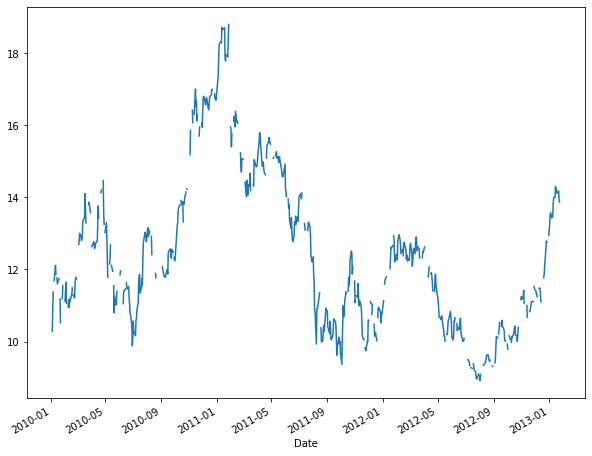

In [ ]:
# graficando Adj Close
plot =df["Close"].mask(np.random.random(df["Close"].shape)<0.1).plot(figsize=(10, 8))

In [ ]:
import statsmodels.api as sm

#### CON TENDENCIA

/home/carlita/envs/diplomado/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


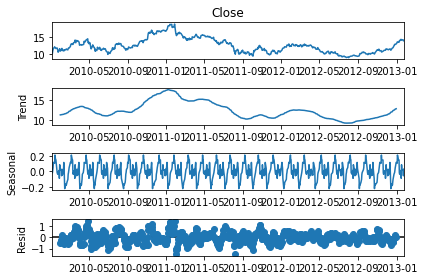

In [ ]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(df["Close"].dropna(),
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

In [ ]:
#interpolacion lineal
#https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_lineal

In [ ]:
df["Close"].head(50)

Date
2010-01-04    10.28
2010-01-05    10.96
2010-01-06    11.37
2010-01-07    11.66
2010-01-08    11.69
2010-01-11    12.11
2010-01-12    11.87
2010-01-13      NaN
2010-01-14    11.76
2010-01-15    11.60
2010-01-19    11.75
2010-01-20      NaN
2010-01-21    11.18
2010-01-22    10.52
2010-01-25    11.03
2010-01-26    11.19
2010-01-27    11.55
2010-01-28      NaN
2010-01-29    10.84
2010-02-01    11.12
2010-02-02    11.39
2010-02-03    11.64
2010-02-04    11.06
2010-02-05      NaN
2010-02-08    10.97
2010-02-09    11.15
2010-02-10    10.94
2010-02-11    11.18
2010-02-12    11.12
2010-02-16    11.32
2010-02-17    11.49
2010-02-18      NaN
2010-02-19    11.29
2010-02-22    11.21
2010-02-23    11.60
2010-02-24    11.73
2010-02-25    11.78
2010-02-26    11.74
2010-03-01      NaN
2010-03-02    12.22
2010-03-03    12.69
2010-03-04    12.79
2010-03-05    13.00
2010-03-08    12.93
2010-03-09    12.80
2010-03-10    12.82
2010-03-11    12.91
2010-03-12    13.34
2010-03-15    13.40
2010-03-16    1

In [ ]:
#Interpolación lineal
df["Close"].interpolate(method="linear")

Date
2010-01-04    10.280
2010-01-05    10.960
2010-01-06    11.370
2010-01-07    11.660
2010-01-08    11.690
2010-01-11    12.110
2010-01-12    11.870
2010-01-13    11.815
2010-01-14    11.760
2010-01-15    11.600
2010-01-19    11.750
2010-01-20    11.465
2010-01-21    11.180
2010-01-22    10.520
2010-01-25    11.030
2010-01-26    11.190
2010-01-27    11.550
2010-01-28    11.195
2010-01-29    10.840
2010-02-01    11.120
Name: Close, dtype: float64

In [ ]:
df["Close"].interpolate(method="spline",order=2)

Date
2010-01-04    10.280000
2010-01-05    10.960000
2010-01-06    11.370000
2010-01-07    11.660000
2010-01-08    11.690000
                ...    
2013-01-18    14.110000
2013-01-22    14.170000
2013-01-23    13.880000
2013-01-24    13.870000
2013-01-25    13.216979
Name: Close, Length: 771, dtype: float64

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [ ]:
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [ ]:
df['d'].interpolate(method='polynomial', order=2)

0     1.0
1     4.0
2     9.0
3    16.0
Name: d, dtype: float64

In [ ]:
#FFILL (ANTERIOR)
df["Close_ffill"]=df["Close"].fillna(method="ffill")

In [ ]:
df.head(20)

,High,Low,Open,Close,Volume,Adj Close,Close_ffill
Date,,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,7.238358,10.28
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.717158,10.96
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,8.005848,11.37
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,8.210042,11.66
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,8.231167,11.69
2010-01-11,12.14,11.78,11.90,12.11,170626200.0,8.526896,12.11
2010-01-12,12.03,11.72,11.98,11.87,162995900.0,8.357905,11.87
2010-01-13,11.93,11.47,11.91,11.68,154527100.0,8.224124,11.68
2010-01-14,11.86,11.51,11.65,11.76,116531200.0,8.280453,11.76


In [ ]:
#BFILL (POSTERIOR)
df["Close_bfill"]=df["Close"].fillna(method="bfill")

In [ ]:
df.head(20)

,High,Low,Open,Close,Volume,Adj Close,Close_ffill,Close_bfill
Date,,,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,7.238358,10.28,10.28
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.717158,10.96,10.96
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,8.005848,11.37,11.37
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,8.210042,11.66,11.66
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,8.231167,11.69,11.69
2010-01-11,12.14,11.78,11.90,12.11,170626200.0,8.526896,12.11,12.11
2010-01-12,12.03,11.72,11.98,11.87,162995900.0,8.357905,11.87,11.87
2010-01-13,11.93,11.47,11.91,11.68,154527100.0,8.224124,11.68,11.68
2010-01-14,11.86,11.51,11.65,11.76,116531200.0,8.280453,11.76,11.76


#### SIN TENDENCIA

In [ ]:
df = data.DataReader("F", 'yahoo', start, end)
df["Close"]=2222
df["Close"]=df["Close"].mask(np.random.random(df["Close"].shape)<0.1)

/home/carlita/envs/diplomado/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


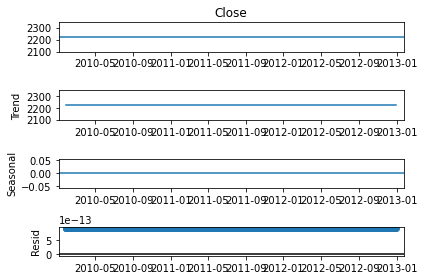

In [ ]:
descomposicion = sm.tsa.seasonal_decompose(df["Close"].dropna(),
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

In [ ]:
import random

In [ ]:
df["Close"].isnull().sum()

73

In [ ]:
random.choice([1,2,3])

1

In [ ]:
df["Close_random"]=df["Close"].apply(lambda x: np.random.choice(df["Close"].dropna().values) if np.isnan(x) else x)

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Close_random
Date,,,,,,,
2010-01-04,10.28,10.05,10.17,2222.0,60855800.0,7.238358,2222.0
2010-01-05,11.24,10.40,10.45,2222.0,215620200.0,7.717158,2222.0
2010-01-06,11.46,11.13,11.21,2222.0,200070600.0,8.005848,2222.0
2010-01-07,11.69,11.32,11.46,2222.0,130201700.0,8.210042,2222.0
2010-01-08,11.74,11.46,11.67,2222.0,130463000.0,8.231167,2222.0
...,...,...,...,...,...,...,...
2013-01-18,14.13,13.97,14.10,2222.0,45716100.0,10.120654,2222.0
2013-01-22,14.19,14.00,14.06,2222.0,35467900.0,10.163690,2222.0
2013-01-23,14.02,13.79,14.00,2222.0,58122200.0,9.955684,2222.0


## IMPUTACION POR MODELOS
https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34ebm